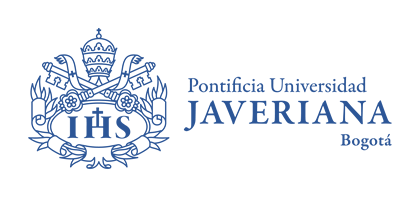


# Proyecto IA

## Librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## Datos

### Datos IPC

In [3]:
# Leer un excel con pandas desde la fila 17
df_ipc = pd.read_excel('data/IPC_Por_ciudad_IQY.xlsx',skiprows=range(0,2))
df_ipc

,Fecha,"Bogotá, D.C.",Cali,Medellín,Barranquilla,Armenia,Bucaramanga,Cartagena De Indias,Cúcuta,Florencia,...,Pasto,Pereira,Popayán,Riohacha,Santa Marta,Sincelejo,Tunja,Valledupar,Villavicencio,Otras Areas Urbanas
0,1979-01-31 00:00:00,0.54,0.66,0.55,0.59,NaN,0.51,NaN,NaN,NaN,...,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-02-28 00:00:00,0.55,0.66,0.55,0.61,NaN,0.54,NaN,NaN,NaN,...,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-03-31 00:00:00,0.57,0.69,0.57,0.63,NaN,0.56,NaN,NaN,NaN,...,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979-04-30 00:00:00,0.58,0.7,0.58,0.65,NaN,0.56,NaN,NaN,NaN,...,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979-05-31 00:00:00,0.6,0.71,0.6,0.66,NaN,0.58,NaN,NaN,NaN,...,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,Fuente: Departamento Administrativo Nacional d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184,(-) Indica que no hay dato disponible.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ciudades = df_ipc.columns[1:23].tolist()
ciudades

['Bogotá, D.C.',
 'Cali',
 'Medellín',
 'Barranquilla',
 'Armenia',
 'Bucaramanga',
 'Cartagena De Indias',
 'Cúcuta',
 'Florencia',
 'Ibagué',
 'Manizales',
 'Montería',
 'Neiva',
 'Pasto',
 'Pereira',
 'Popayán',
 'Riohacha',
 'Santa Marta',
 'Sincelejo',
 'Tunja',
 'Valledupar',
 'Villavicencio']

### Datos Temperatura

Se necesitan los datos de longitud y latitud de las ciudades en el dataframe del IPC para hallar los valores de tempartura, humedad y precipitación.

Los datos de coordenadas geográficas de longitud y latitud se obtuvieron de: https://www.geodatos.net/coordenadas/colombia/


In [5]:
city_coordinates = {
    'Bogotá, D.C.': {'lat': 4.60971, 'lon': -74.08175},
    'Cali': {'lat': 3.43722, 'lon': -76.5225},
    'Medellín': {'lat': 6.25184, 'lon': -75.56359},
    'Barranquilla': {'lat': 10.96854, 'lon': -74.78132},
    'Armenia': {'lat': 4.53389, 'lon': -75.68111},
    'Bucaramanga': {'lat': 7.12539, 'lon': -73.1198},
    'Cartagena De Indias': {'lat': 10.39972, 'lon': -75.51444},
    'Cúcuta': {'lat': 7.89391, 'lon': -72.50782},
    'Florencia': {'lat': 1.61438, 'lon': -75.60623},
    'Ibagué': {'lat': 4.43889, 'lon': -75.23222},
    'Manizales': {'lat': 5.06889, 'lon': -75.51738},
    'Montería': {'lat': 8.74798, 'lon': -75.88143},
    'Neiva': {'lat': 2.9273, 'lon': -75.28189},
    'Pasto': {'lat': 1.21361, 'lon': -77.28111},
    'Pereira': {'lat': 4.81333, 'lon': -75.69611},
    'Popayán': {'lat': 2.43823, 'lon': -76.61316},
    'Riohacha': {'lat': 11.54444, 'lon': -72.90722},
    'Santa Marta': {'lat': 11.24079, 'lon': -74.19904},
    'Sincelejo': {'lat': 9.30472, 'lon': -75.39778},
    'Tunja': {'lat': 5.53528, 'lon': -73.36778},
    'Valledupar': {'lat': 10.46314, 'lon': -73.25322},
    'Villavicencio': {'lat': 4.142, 'lon': -73.62664}
}

#período de tiempo
start_date = '20100101' #2010-01-01
end_date = '20240331' #2024-03-31

In [6]:
# Variables a recuperar (temperatura y precipitación)
parameters = ['T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR','T2M','WS10M']
parameters_subset = ','.join(parameters)

In [7]:
# Obtención de datos
for ciudad, coords in city_coordinates.items():
    lat, lon = coords['lat'], coords['lon']
    url = f'https://power.larc.nasa.gov/api/temporal/daily/point?parameters={parameters_subset}&community=SB&longitude={lon}&latitude={lat}&start={start_date}&end={end_date}&format=CSV'
    response = requests.get(url)
    data = response.text
    data_parts = data.split('-END HEADER-')
    actual_data = data_parts[1].strip()
    with open(f'data/temp_diaria_{ciudad}.csv', 'w') as f:
        f.write(actual_data)
    df = pd.read_csv(f'data/temp_diaria_{ciudad}.csv')
    print(f'Datos para {ciudad}:')
    print(df.head())

Datos para Bogotá, D.C.:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    26.90    12.31  54.62          0.0  18.78   1.82
1  2010   1   2    27.57    12.08  52.69          0.0  18.80   1.88
2  2010   1   3    27.47     9.58  48.19          0.0  17.93   2.55
3  2010   1   4    27.99    10.55  48.12          0.0  18.88   2.14
4  2010   1   5    27.99    12.64  52.38          0.0  20.31   1.54
Datos para Cali:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    24.81    10.76  72.06         0.09  17.06   1.38
1  2010   1   2    25.51    10.99  71.56         0.07  16.98   1.46
2  2010   1   3    25.72     8.23  67.56         0.01  16.57   2.05
3  2010   1   4    25.63     9.16  66.44         0.00  17.08   2.50
4  2010   1   5    23.83    10.87  74.81         0.00  17.05   1.45
Datos para Medellín:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    22.24    10.60  80.62         2.19

## Preparación de Datos

### Datos IPC

In [8]:
def convert_to_datetime(df_ipc, column):
    """
    Convierte una columna de un DataFrame a datetime y la establece como índice.
    Args:
        df_ipc (DataFrame): El DataFrame.
        column (str): El nombre de la columna a convertir.
    Returns:
        DataFrame: El DataFrame con la columna convertida a datetime y establecida como índice.
    """
    # Convertir la columna a datetime
    df_ipc[column] = pd.to_datetime(df_ipc[column])

    # Dejar solo el mes y el año
    df_ipc[column] = df_ipc[column].dt.to_period('M')

    # Establecer la columna como índice
    df_ipc.set_index(column, inplace=True)

    return df_ipc

Hacer un diccionario de cada ciudad con su IPC, IPC año corrido, IPC anual e IPC mensual. Todos desde el 2010

In [9]:
# Diccionario para almacenar los DataFrames
cities_dict = {}


IPC = convert_to_datetime(df_ipc.iloc[:543, :-1].copy(), 'Fecha')
IPC.columns = [f"{col}" for col in IPC.columns]
IPC = IPC.loc['2010':]

IPC_var_anio_corr = convert_to_datetime(df_ipc.iloc[546:1089, :-1].copy(), 'Fecha')
IPC_var_anio_corr.columns = [f"{col}" for col in IPC_var_anio_corr.columns]
IPC_var_anio_corr = IPC_var_anio_corr.loc["2010":]

IPC_anual = convert_to_datetime(df_ipc.iloc[1092:1635, :-1].copy(), 'Fecha')
IPC_anual.columns = [f"{col}" for col in IPC_anual.columns]
IPC_anual = IPC_anual.loc["2010":]

IPC_mensual = convert_to_datetime(df_ipc.iloc[1638:2181, :-1].copy(), 'Fecha')
IPC_mensual.columns = [f"{col}" for col in IPC_mensual.columns]
IPC_mensual = IPC_mensual.loc["2010":]

In [45]:
IPC_mensual['Neiva']

Fecha
2010-01    0.58
2010-02    0.77
2010-03    0.08
2010-04    0.39
2010-05    0.37
           ... 
2023-11    0.23
2023-12    0.21
2024-01    1.01
2024-02    0.73
2024-03    0.47
Freq: M, Name: Neiva, Length: 171, dtype: object

### Datos Temperatura

Datos promedio mensuales de cada valor de temperatura registrado diariamente en las ciudades.

In [44]:
for ciudad in city_coordinates.keys():
    df = pd.read_csv(f'data/temp_diaria_{ciudad}.csv')
    df['Fecha'] = pd.to_datetime(df[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1))
    df = df.set_index('Fecha')
    df = df.drop(columns=['YEAR', 'MO', 'DY'])
    df = df.resample('ME').mean()
    df.index = df.index.to_period('M')
    print(f'Datos para {ciudad}:')
    print(df.head())

Datos para Bogotá, D.C.:
           T2M_MAX    T2M_MIN       RH2M  PRECTOTCORR        T2M     WS10M
Fecha                                                                     
2010-01  28.290323  14.572903  56.022581     0.420645  20.783871  2.373548
2010-02  28.751429  16.600357  61.676429     1.567857  21.900000  1.888571
2010-03  27.279032  16.360000  67.231613     3.154516  21.149677  1.497742
2010-04  24.373000  15.902000  80.660667     8.706333  19.568000  1.303667
2010-05  23.441613  15.351613  82.858065     8.090323  18.984839  1.532258
Datos para Cali:
           T2M_MAX    T2M_MIN       RH2M  PRECTOTCORR        T2M     WS10M
Fecha                                                                     
2010-01  24.247419  12.430000  74.711613     0.283548  17.611613  2.027419
2010-02  24.039286  13.996786  77.885714     1.324643  18.156429  1.772500
2010-03  23.913548  13.743226  77.193226     1.023226  18.076774  1.758387
2010-04  22.143000  13.842333  84.592000     7.190667  17.

### Unir Datos del IPC Mensual con los datos de temperatura

In [47]:
dict_ciudades = {}
for ciudad in city_coordinates.keys():
    df = pd.read_csv(f'data/temp_diaria_{ciudad}.csv')
    df['Fecha'] = pd.to_datetime(df[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1))
    df = df.set_index('Fecha')
    df = df.drop(columns=['YEAR', 'MO', 'DY'])
    df = df.resample('ME').mean()
    df.index = df.index.to_period('M')
    df_ciudades = pd.concat([IPC_mensual[[ciudad]], df], axis=1)
    dict_ciudades[ciudad] = df_ciudades
    print(dict_ciudades[ciudad])

        Bogotá, D.C.    T2M_MAX    T2M_MIN       RH2M  PRECTOTCORR        T2M  \
Fecha                                                                           
2010-01         0.72  28.290323  14.572903  56.022581     0.420645  20.783871   
2010-02         0.82  28.751429  16.600357  61.676429     1.567857  21.900000   
2010-03         0.25  27.279032  16.360000  67.231613     3.154516  21.149677   
2010-04         0.28  24.373000  15.902000  80.660667     8.706333  19.568000   
2010-05         0.23  23.441613  15.351613  82.858065     8.090323  18.984839   
...              ...        ...        ...        ...          ...        ...   
2023-11         0.29  23.898333  15.323667  81.342333     5.673667  19.179333   
2023-12         0.48  24.404194  15.560968  80.679032     4.315161  19.542903   
2024-01         0.68  26.288387  14.625806  71.830645     0.619355  20.018710   
2024-02         1.37  24.270690  15.894138  83.167931    13.909310  19.672414   
2024-03         0.82  24.481

In [50]:
dict_ciudades['Bogotá, D.C.']

,"Bogotá, D.C.",T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,T2M,WS10M
Fecha,,,,,,,
2010-01,0.72,28.290323,14.572903,56.022581,0.420645,20.783871,2.373548
2010-02,0.82,28.751429,16.600357,61.676429,1.567857,21.900000,1.888571
2010-03,0.25,27.279032,16.360000,67.231613,3.154516,21.149677,1.497742
2010-04,0.28,24.373000,15.902000,80.660667,8.706333,19.568000,1.303667
2010-05,0.23,23.441613,15.351613,82.858065,8.090323,18.984839,1.532258
...,...,...,...,...,...,...,...
2023-11,0.29,23.898333,15.323667,81.342333,5.673667,19.179333,1.609667
2023-12,0.48,24.404194,15.560968,80.679032,4.315161,19.542903,1.663548
2024-01,0.68,26.288387,14.625806,71.830645,0.619355,20.018710,2.215484


## Exploración y visualización de datos

In [20]:
for ciudad in ciudades:
    print((cities_dict[f"{ciudad}"]["merged"]).describe())

       T2M_MAX_Bogotá, D.C.  T2M_MIN_Bogotá, D.C.  RH2M_Bogotá, D.C.  \
count            171.000000            171.000000         171.000000   
mean              23.776808             14.483519          79.316030   
std                1.170971              0.809188           4.715146   
min               21.421000             12.488710          56.022581   
25%               23.028823             13.888871          77.822425   
50%               23.654839             14.475161          79.901290   
75%               24.239793             15.085473          82.265124   
max               28.751429             16.616774          87.984333   

       PRECTOTCORR_Bogotá, D.C.  T2M_Bogotá, D.C.  WS10M_Bogotá, D.C.  
count                171.000000        171.000000          171.000000  
mean                   5.130593         18.696227            1.762374  
std                    2.657664          0.759504            0.385097  
min                    0.420645         17.334194            1.